# Simple Linear Regression
Simple regression is when one `x` or independent variable is used to estimate a dependent variable `y`. 

In this notebook, we will see how we can predict Co2 Emission from a feature named `EngineSize`.
Hence, x is `ENGINESIZE` and y (target variable) is `CO2EMISSIONS`.

### Import the packages


In [111]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Load the data


In [112]:
df = pd.read_csv("../../data/FuelConsumption.csv")

# display the first few columns of the dataset
df.head()

,Unnamed: 0,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244



## Understand the Data

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


### Exploratory Data Anaylsis 
Let's study the data

In [113]:
# summarize the data
df.describe()

,Unnamed: 0,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.000000,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,533.000000,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,308.160672,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,0.000000,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,266.500000,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,533.000000,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,799.500000,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,1066.000000,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Let's select some features to explore more.


In [114]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


### Visualizations

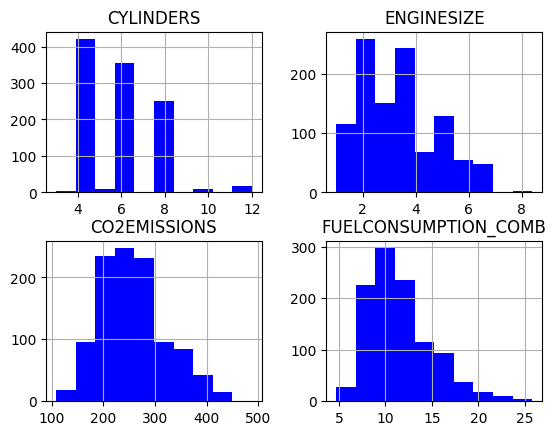

In [115]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist(color="blue")
plt.show()

### Plotting each of the features against the Emission, to see how linear their relationship is:

Plotting __FUELCONSUMPTION_COMB__ vs the Emission:

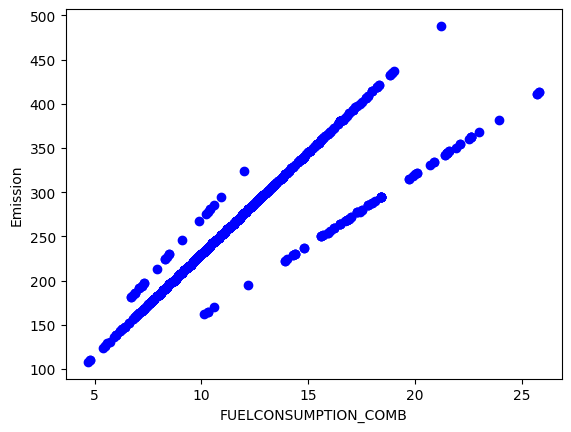

In [116]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

Plotting __ENGINESIZE__ vs the Emission:

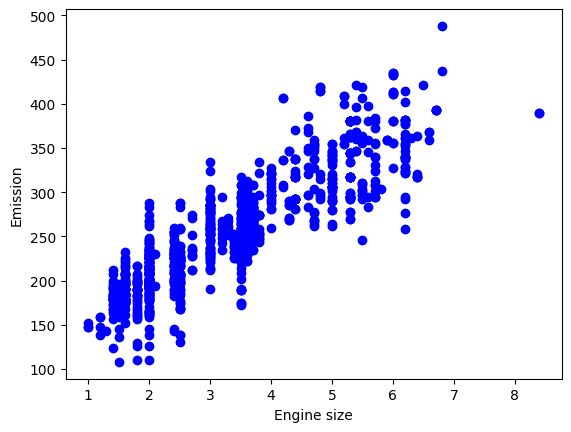

In [117]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Plotting __CYLINDER__ vs the Emission:


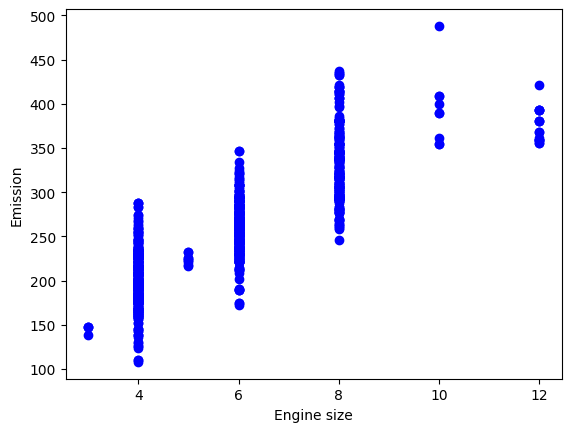

In [118]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()


### Train and Test Dataset Split

When building a machine learning model, it is important to evaluate how well it performs on new, unseen data. Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. To do this, we split our dataset into two parts:

**Training Set**: Used to train the model.

**Testing Set**: Used to test how well the model performs on data it has not seen before.

By doing this split, we get a better understanding of how well the model generalizes to new data, as the testing set acts like "new" data that the model has never encountered during training (**out-of-sample accuracy**). This helps us measure the model’s accuracy and reliability.

For example, we can split our dataset so that 80% is used for training and 20% is used for testing. To do this, we use a simple method to randomly select rows for each set. One common approach is to use the __np.random.rand()__ function from the NumPy library to create a random mask for splitting the data.

In [119]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Train data distribution


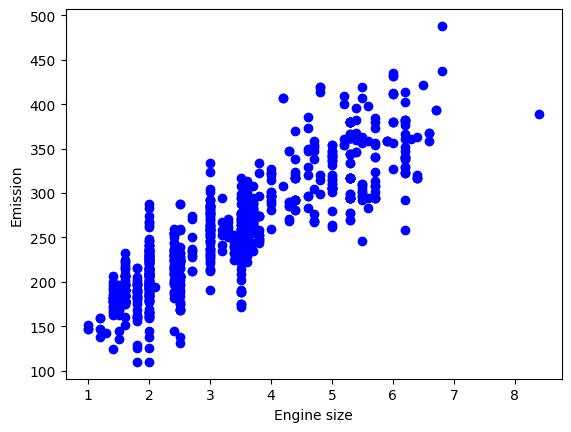

In [120]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

### Linear Regression Model

In simple terms, Linear Regression tries to find the **best-fitting straight** line that predicts the value of `y` (the target) based on the input features (`x`). 

The model does this by minimizing the difference (error) between the actual values (y) and the predicted values ($\hat{y}$). This difference is called the '__residual__'. The model tries to reduce the sum of these residuals to get the best possible line that represents the relationship between x and y.

The coefficients B1, B2, ..., Bn are the weights assigned to each feature, and the goal is to find these coefficients that minimize the '__residual sum of squares__'(RSS), which is the sum of the squared differences between the actual and predicted values.


In [121]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.25424662]]
Intercept:  [125.04118437]



**Note** that all of the data must be available to traverse and calculate the `Coefficient` and `Intercept`.


### Plot outputs


We can plot the fit line over the data:


Text(0, 0.5, 'Emission')

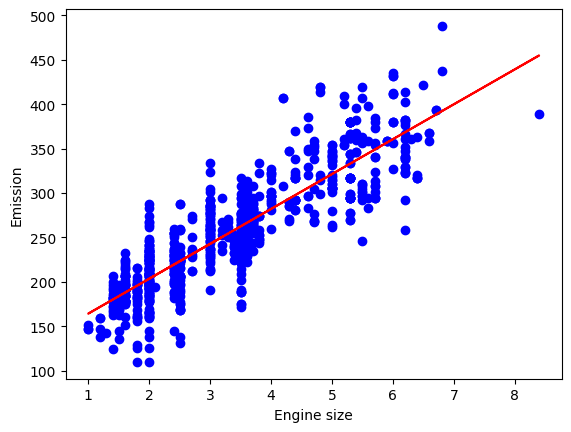

In [122]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

### Evaluation
We compare the actual values and predicted values to calculate the accuracy of a regression model.

In [123]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 21.76
Residual sum of squares (MSE): 825.07
R2-score: 0.78
